In [2]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-09-06 20:44:56.610888: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-06 20:44:56.647234: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-06 20:44:57.171021: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Coletando dados 


#######################################################

#     Este programa quando executado usa dados reconstruídos

#     Para refazer as previsões, tem que apagar os dados dos anos para prever na planilha

########################################################

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sparidae/André - RJ_Reconstrucao_Sparidae_2024_08_15.xlsx')
df_Peixe_pena_ind = pd.DataFrame(df[['Ano','Peixe_pena_ind']])

dados = df_Peixe_pena_ind.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1978,1979,1980,1981,1982,1983,1986,1990,1991,1992,1993,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Peixe_pena_ind'].values
dados.head()

,Ano,Peixe_pena_ind
26,1976,16.0
27,1977,8.0
34,1984,0.0
35,1985,0.0
37,1987,0.0


In [4]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [10]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=10, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sparidae/Peixe_pena/pesos pesca ind/.weights.h5', overwrite=True)

Epoch 1/10


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step - loss: 1.0083
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9676
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9340
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8995
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8638
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8281
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7930
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7601
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7323
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7151


In [6]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sparidae/Peixe_pena/pesos pesca ind/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Previsões dos dados ausentes: [[5.67083   ]
 [5.492262  ]
 [5.3136935 ]
 [5.135125  ]
 [4.9565563 ]
 [4.777987  ]
 [4.2419534 ]
 [3.5275435 ]
 [3.3493571 ]
 [3.1714745 ]
 [2.9946563 ]
 [2.6344361 ]
 [2.4480023 ]
 [2.2594202 ]
 [2.0641704 ]
 [1.8623157 ]
 [1.6158198 ]
 [1.2685224 ]
 [1.0646687 ]
 [0.9502356 ]
 [0.86257803]
 [0.7895976 ]
 [0.7158607 ]
 [0.64396656]
 [0.572912  ]
 [0.50329125]
 [0.43482125]
 [0.30051434]
 [0.23386216]
 [0.1677978 ]
 [0.10188305]
 [0.03636456]]


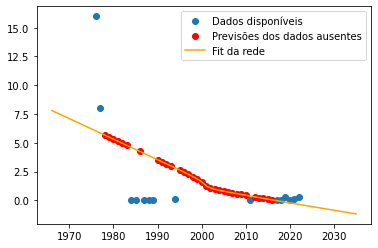

In [11]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

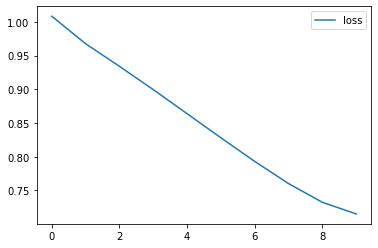

In [12]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [13]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*pesca_std + pesca_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0


df_preenchido = pd.DataFrame({'Ano':anos, 'Peixe_pena_ind':prev_continua.flatten()})


df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sparidae/Peixe_pena/Interpolações Peixe_pena_ind.xlsx')

df_preenchido

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Ano,Peixe_pena_ind
0,1950,10.649229
1,1951,10.471595
2,1952,10.293961
3,1953,10.116327
4,1954,9.938693
...,...,...
62,2012,0.300514
63,2013,0.233862
64,2014,0.167798
65,2015,0.101883
